# Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image

In [ ]:
path='./Assignment 2/'

In [ ]:
data=np.load(path+'sample_images.npy')
data.shape

(10, 28, 28)

In [ ]:
data[0,0,0]

255

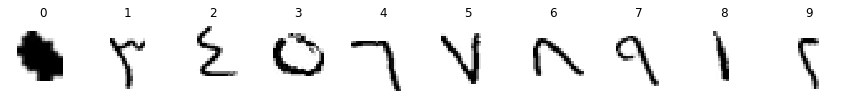

In [ ]:
plt.figure(figsize=(15.,30.))
for i in range(data.shape[0]):
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(data[i]/255.,cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
path+='visual_sudoku/train/'
path

'./Assignment 2/visual_sudoku/train/'

In [ ]:
X_path=path+'query/'
Y_path=path+'target/'

In [ ]:
X=os.listdir(X_path)
print(len(X),X[0])
Y=os.listdir(Y_path)
print(len(Y),Y[0])

10000 3975.png
10000 3975.png


(224, 224) (224, 224)


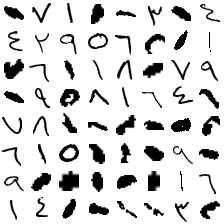

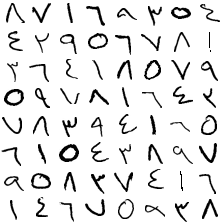

(224, 224) (224, 224)


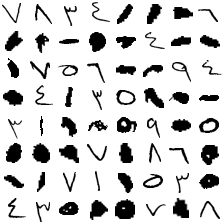

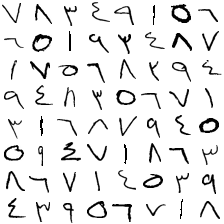

(224, 224) (224, 224)


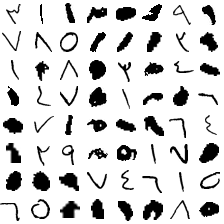

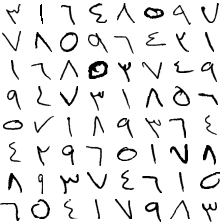

In [ ]:
some_samples=['0','10','100']
for img in some_samples:
    x=Image.open(X_path+img+'.png')
    y=Image.open(Y_path+img+'.png')
    print(x.size, y.size)
    display(x)
    display(y)

# Get dataset for training cGAN

task is to assign appropriate labels using just one example from each : one-shot learning

ideas : 
1. 10-Means clustering, and assigning each cluster the best label (using euclidean distance)
2. Matching networks for one-shot learning : MAN

In [ ]:
path = './Assignment 2/'
dataset_path=path+'visual_sudoku/train/query/'

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL.Image as Image

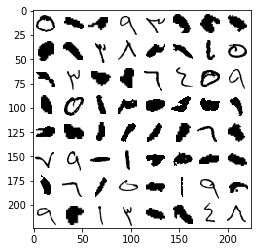

In [ ]:
img = np.array(Image.open(os.path.join(dataset_path,'3975.png'))) # 224,224 = 64 * 28,28
plt.imshow(img,cmap='gray')
plt.show()

(8, 8, 28, 28)


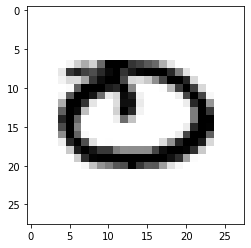

In [ ]:
x=np.split(img,8)
y=[np.split(x_,8,axis=1) for x_ in x]
y=np.array(y)
print(y.shape)
plt.imshow(y[1,-1]/255.,cmap='gray')
plt.show()

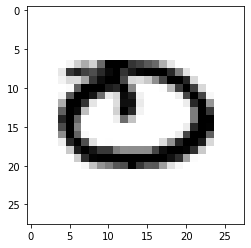

In [ ]:
y=y.reshape((-1,28,28))
plt.imshow(y[15]/255., cmap='gray')
plt.show()

In [ ]:
# print(os.listdir(dataset_path)[:5])
# X=[] #this will contain 28,28 images
# for img_name in os.listdir(dataset_path):
#     img = np.array(Image.open(os.path.join(dataset_path,img_name))) # 224,224 = 64 * 28,28
#     sub_imgs=np.split(img,8)
#     sub_imgs=[np.split(x_,8,axis=1) for x_ in sub_imgs]
#     sub_imgs=np.array(sub_imgs) # 8,8,28,28
#     sub_imgs=sub_imgs.reshape((-1,28,28))
#     X.append(sub_imgs)

['3975.png', '8820.png', '9280.png', '348.png', '1804.png']


In [ ]:
# X=np.array(X)
# X=X.reshape((-1,28,28))
# print(X.shape, X.dtype)

(640000, 28, 28) uint8


In [ ]:
# np.save('query_64k_images.npy', X)
X=np.load('query_64k_images.npy')

In [ ]:
path

'./Assignment 2/'

In [ ]:
oneshot_data=np.load(path+'sample_images.npy')
print(oneshot_data.shape)

(10, 28, 28)


In [ ]:
from sklearn.cluster import KMeans as KMeans

In [ ]:
# kmeans=KMeans(n_clusters=10).fit(X.reshape((-1,28*28))) : working with 28,28 images is not possible : Curse of Dimensionality

In [ ]:
X=X/255.

In [ ]:
X=X.reshape((-1,28*28))

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

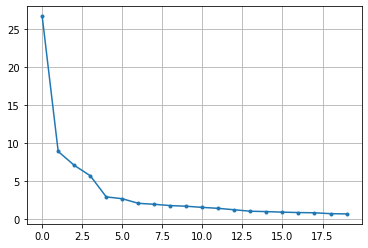

In [ ]:
plt.plot(100*pca.explained_variance_ratio_,marker='.')
plt.grid()

In [ ]:
print(sum(100*pca.explained_variance_ratio_[:5]),sum(100*pca.explained_variance_ratio_[5:]))

51.36684911775246 20.861400135295796


In [ ]:
# taking first 5 principal components
pca=decomposition.PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_in_5D = pca.transform(X)
print(X_in_5D.shape,X_in_5D[:2])

(640000, 5) [[-0.90999226  0.1415776   1.35642735  5.42577282 -1.6703904 ]
 [ 1.44664982  4.00177241 -3.41978547 -1.23484445 -0.71589288]]


In [ ]:
oneshot_data=oneshot_data/255.
oneshot_data=oneshot_data.reshape((-1,28*28))
oneshot_data_in_5D=pca.transform(oneshot_data)
print(oneshot_data_in_5D.shape,oneshot_data_in_5D[:2])

(10, 5) [[ 9.76699757 -2.25062596 -0.59347452 -0.70268069 -0.32628396]
 [-2.24179222 -2.72926742  2.26380454 -0.11653436 -1.23008147]]


In [ ]:
print(X_in_5D.mean(axis=0))
print(oneshot_data_in_5D.mean(axis=0))

[-2.91478753e-13 -6.75733990e-14  7.88098614e-15 -1.30108263e-13
 -6.27937671e-14]
[ 0.00000000e+00 -2.22044605e-16 -6.66133815e-17  2.88657986e-16
  0.00000000e+00]


In [ ]:
# np.save('X_in_5D.npy',X_in_5D)
# np.save('oneshot_data_in_5D.npy',oneshot_data_in_5D)
X_in_5D=np.load('X_in_5D.npy')
oneshot_data_in_5D=np.load('oneshot_data_in_5D.npy')

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
km=KMeans(n_clusters=10)
km.fit(X_in_5D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(km.cluster_centers_.shape, oneshot_data_in_5D.shape)
print(km.cluster_centers_[0])
print(oneshot_data_in_5D[0])

(10, 5) (10, 5)
[-4.16088308 -0.04563294  1.0732991  -0.48723227  0.03921213]
[ 9.76699757 -2.25062596 -0.59347452 -0.70268069 -0.32628396]


In [ ]:
# finding euclidean distance
# np.linalg.norm?
# temp=oneshot_data_in_5D-km.cluster_centers_[0]
# print(temp.shape)
# print(temp[0])
# temp2=np.linalg.norm(temp,axis=1)
# print(temp2.shape)
# print(temp2[0])
# print(np.sqrt(np.sum(temp**2,axis=1))[0])

(10, 5)
[13.95501576 -2.14502486 -1.68948966 -0.22180718 -0.40955852]
(10,)
14.227259344057225
14.227259344057225


In [ ]:
km.cluster_centers_

array([[-4.16088308, -0.04563294,  1.0732991 , -0.48723227,  0.03921213],
       [ 5.05961258,  1.18991919, -2.00116556, -0.04720648,  0.45864871],
       [ 1.71348428, -1.9445355 , -3.3655835 , -1.84547007, -0.22806692],
       [ 2.43549553, -3.62268789,  2.22965287, -1.77233961, -0.20994577],
       [-3.03991755,  0.40841968, -0.67946908,  0.45878384, -1.49939177],
       [ 2.27617838,  3.26143935,  3.15443979, -1.44292105,  0.32504947],
       [-2.73500512, -0.87650407, -0.77498112,  0.4574112 ,  2.26755268],
       [ 1.22807092,  4.8824125 , -1.54837018, -1.19068104, -0.24789308],
       [-0.83860897, -0.62549539,  0.08183846,  4.92276415, -0.25555767],
       [ 6.84022308, -0.76105177,  1.36256246,  1.17407786, -0.13259699]])

In [ ]:
l2l=[]
for label in range(10):
    L2_distances=np.linalg.norm(oneshot_data_in_5D-kmeans_clusters[label],axis=1)
    for t in l2l:
        L2_distances[t]=100
    l2l.append(L2_distances.argmin())

In [ ]:
l2l=np.array(l2l)
print(l2l, type(l2l))
# print(oneshot_data_in_5D)
# print(X_in_5D)

[8 7 0 9 1 5 3 4 6 2] <class 'numpy.ndarray'>


In [ ]:
Y=km.labels_
print(Y.shape)
print(Y)
Y=l2l[Y]
print(Y)

(640000,)
[8 7 2 ... 0 5 2]
[6 4 0 ... 8 5 0]


In [ ]:
# np.save('query_64k_labels.npy',Y.astype(np.uint8))
Y=np.load('query_64k_labels.npy')

# cGAN

In [ ]:
X=np.load('query_64k_images.npy')
Y=np.load('query_64k_labels.npy')
print(X.shape, Y.shape, X.dtype, Y.dtype)

(640000, 28, 28) (640000,) uint8 uint8


In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
mnist = fetch_openml('mnist_784')
data_X = mnist.data
data_Y = mnist.target
data_Y=torch.from_numpy(data_Y.astype(int))
data_X=torch.from_numpy(data_X/255.)
print(data_X.shape, data_Y.shape, data_X.dtype, data_Y.dtype)

torch.Size([70000, 784]) torch.Size([70000]) torch.float64 torch.int64


In [24]:
class Maxout_layer(nn.Module):
    def __init__(self, input_dim=784, output_dim=240, pieces=5):
        super(Maxout_layer, self).__init__()
        self.fc_layers=[nn.Linear(in_features=input_dim,out_features=pieces)]*output_dim
    
    def forward(self,inp): # inp.shape=batch_size,784
        op=[fc_layer.to(inp.device)(inp) for fc_layer in self.fc_layers]
        op=torch.stack([torch.max(o,axis=1)[0] for o in op])
        op=op.permute(1,0)
        return op
        
# inp=torch.rand(2,3)
# m=Maxout_layer(3,4,5)
# op=m(inp)
# print(op.shape)

class Generator(nn.Module):
    def __init__(self, latent_dim=100, num_labels=10, output_dim=784):
        super(Generator, self).__init__()
        self.latent_dim=latent_dim
        self.num_labels=num_labels
        self.output_dim=output_dim
        
        self.embedding=torch.tensor(np.eye(self.num_labels)).float()
        
        self.dp1=nn.Dropout(0.5)
        self.fc1=nn.Linear(in_features=100,out_features=200)
        self.dp2=nn.Dropout(0.5)
        self.fc2=nn.Linear(in_features=10,out_features=1000)
        self.dp3=nn.Dropout(0.5)
        self.fc3=nn.Linear(in_features=1200,out_features=784)
                
    def forward(self,z,y): # z:batch_size,100; y:batch_size,
        z=self.dp1(z)
        op1=self.dp2(F.relu(self.fc1(z)))
        y_1hot=self.embedding.to(z.device)[y]
        op2=self.dp3(F.relu(self.fc2(y_1hot)))
        op=torch.cat((op1,op2),dim=-1) #batch_size,1200
        op=torch.sigmoid(self.fc3(op))  
        return op
# z=torch.rand(2,100)
# y=torch.randint(low=0,high=10,size=(2,))
# m=Generator(100,10,784)
# x=m(z,y)
# x.shape

class Discriminator(nn.Module):
    def __init__(self, input_dim=784, num_labels=10, output_dim=1):
        super(Discriminator, self).__init__()
        self.input_dim=input_dim
        self.num_labels=num_labels
        self.output_dim=output_dim
        
        self.embedding=torch.tensor(np.eye(self.num_labels)).float()
        
        self.dp0=nn.Dropout(0.5)
        self.max1=nn.Linear(input_dim, 240)#Maxout_layer(input_dim=input_dim, output_dim=240, pieces=5)
        self.dp1=nn.Dropout(0.5)
        self.max2=nn.Linear(10, 50)#Maxout_layer(input_dim=10, output_dim=50, pieces=5)
        self.dp2=nn.Dropout(0.5)
        self.max3=nn.Linear(290, 240)#Maxout_layer(input_dim=290, output_dim=240, pieces=4)
        self.dp3=nn.Dropout(0.5)
        self.fc=nn.Linear(in_features=240, out_features=1)
    
    def forward(self,x,y): # x:batch_size,784; y:batch_size,
        x=self.dp0(x)
        op1=self.dp1(F.relu(self.max1(x)))
        y_1hot=self.embedding.to(y.device)[y]
        op2=self.dp2(F.relu(self.max2(y_1hot)))
        op=torch.cat((op1,op2),dim=-1)
        op=self.dp3(F.relu(self.max3(op)))
        op=torch.sigmoid(self.fc(op))
        return op

In [47]:
# t=torch.tensor(np.eye(10)).float()
# x=torch.tensor(np.random.randint(0,10,2))
# print(x)
# y=t[x]
# print(y.shape)
# y1=torch.rand(2,100)
# print(y1.shape)
# y2=torch.cat((y,y1),dim=1)
# print(y2.shape)
# print(y2)

# a=torch.rand(2,3)
# b=torch.rand(2,3)
# print(a,b)
# print(torch.max(a,b))

# x=torch.rand(2,784)
# y=torch.randint(low=0,high=10,size=(2,))
# m=Discriminator(784,10,1)
# y_=m(x,y)
# print(y_)

def sample_imgs(generator, device):
  with torch.no_grad():
    z=torch.rand(10,100).to(device)
    z_labels=torch.tensor([0,1,2,3,4,5,6,7,8,9]).to(device)
    x_fake=generator(z,z_labels)
  x_fake=x_fake.cpu().numpy()
  z_labels=z_labels.cpu().numpy()
  print(x_fake.shape,z_labels.shape)

  plt.figure(figsize=(15.,30.))
  for ind in range(10):
    plt.subplot(1,10,ind+1)
    plt.title(z_labels[ind])
    plt.imshow(x_fake[ind].reshape((28,28)),cmap='gray')
    plt.axis('off')
  plt.show()


In [50]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
from IPython import display
import torch.optim as optim

Adjusting learning rate of group 0 to 1.0000e-01.
cuda
(10, 784) (10,)


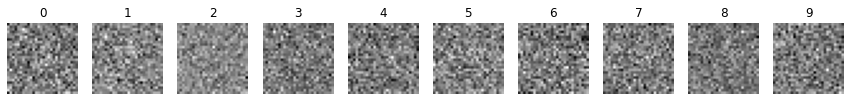

Original Real images


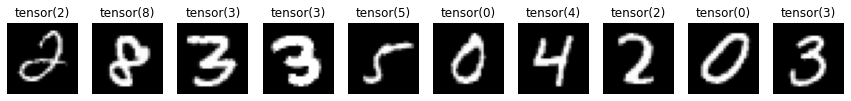

Adjusting learning rate of group 0 to 9.9996e-02.
epoch: 0 discriminator loss: 0.26048500284607157 generator loss: 3.2222937524537025
Adjusting learning rate of group 0 to 9.9992e-02.
epoch: 1 discriminator loss: 0.1877109822117802 generator loss: 3.292090274475433
Adjusting learning rate of group 0 to 9.9988e-02.
epoch: 2 discriminator loss: 0.24584206360163707 generator loss: 2.9372637302447586
Adjusting learning rate of group 0 to 9.9984e-02.
epoch: 3 discriminator loss: 0.26599623050008503 generator loss: 2.70177377754952
Adjusting learning rate of group 0 to 9.9980e-02.
epoch: 4 discriminator loss: 0.26458364531343237 generator loss: 2.732046841265081
(10, 784) (10,)


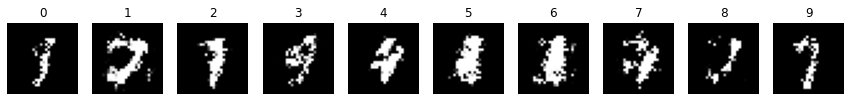

Adjusting learning rate of group 0 to 9.9976e-02.
epoch: 5 discriminator loss: 0.2310671661690478 generator loss: 3.0272980360757735
Adjusting learning rate of group 0 to 9.9972e-02.
epoch: 6 discriminator loss: 0.21839488245847025 generator loss: 3.1882782825183518
Adjusting learning rate of group 0 to 9.9968e-02.
epoch: 7 discriminator loss: 0.20395623427225557 generator loss: 3.3567947101243685
Adjusting learning rate of group 0 to 9.9964e-02.
epoch: 8 discriminator loss: 0.2142933494387529 generator loss: 3.3965938615274953
Adjusting learning rate of group 0 to 9.9960e-02.
epoch: 9 discriminator loss: 0.21335833762591574 generator loss: 3.4805396659906966
(10, 784) (10,)


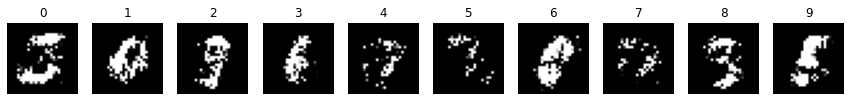

Adjusting learning rate of group 0 to 9.9956e-02.
epoch: 10 discriminator loss: 0.21575571435602595 generator loss: 3.3925785380842046
Adjusting learning rate of group 0 to 9.9952e-02.
epoch: 11 discriminator loss: 0.20657262347993396 generator loss: 3.4305432371167472
Adjusting learning rate of group 0 to 9.9948e-02.
epoch: 12 discriminator loss: 0.20815912524968277 generator loss: 3.4148789871306646
Adjusting learning rate of group 0 to 9.9944e-02.
epoch: 13 discriminator loss: 0.2245938364730213 generator loss: 3.352517980358976
Adjusting learning rate of group 0 to 9.9940e-02.
epoch: 14 discriminator loss: 0.22064614849977005 generator loss: 3.3555930237193685
(10, 784) (10,)


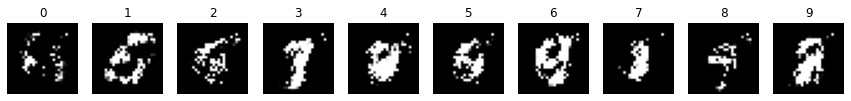

Adjusting learning rate of group 0 to 9.9936e-02.
epoch: 15 discriminator loss: 0.213846189225768 generator loss: 3.397689000154153
Adjusting learning rate of group 0 to 9.9932e-02.
epoch: 16 discriminator loss: 0.20508377626538277 generator loss: 3.5200174693222883
Adjusting learning rate of group 0 to 9.9928e-02.
epoch: 17 discriminator loss: 0.1977160625132449 generator loss: 3.616099549300505
Adjusting learning rate of group 0 to 9.9924e-02.
epoch: 18 discriminator loss: 0.2053284758886138 generator loss: 3.5487344430916474
Adjusting learning rate of group 0 to 9.9920e-02.
epoch: 19 discriminator loss: 0.20898305941304882 generator loss: 3.4912215117569807


In [66]:
dataset=TensorDataset(data_X,data_Y)
data_loader=DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)

discriminator=Discriminator(input_dim=784, num_labels=10, output_dim=1)
generator=Generator(latent_dim=100, num_labels=10, output_dim=784)

loss_fn=nn.BCELoss() # or may use MSE
optim_disc=optim.SGD(discriminator.parameters(),lr=0.1,momentum=0.5)
scheduler_disc=optim.lr_scheduler.ExponentialLR(optim_disc, 1/1.00004, verbose=True)
optim_gen=optim.SGD(generator.parameters(),lr=0.1,momentum=0.5)
scheduler_gen=optim.lr_scheduler.ExponentialLR(optim_gen, 1/1.00004)

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

generator=generator.to(device)
discriminator=discriminator.to(device)
num_epochs=20
for ep in range(num_epochs):
    disc_loss,gen_loss=0,0
    if ep%5==0:
        sample_imgs(generator, device)

    for batch, (X,Y) in enumerate(data_loader):
        # if batch%100==0:
          # print(batch,end='\r')
          # display.clear_output(wait=True)
        if batch==0 and ep==0:
            print("Original Real images")
            plt.figure(figsize=(15.,30.))
            for ind in range(10):
                plt.subplot(1,10,ind+1)
                plt.title(Y[ind])
                plt.imshow(X[ind].reshape((28,28)),cmap='gray')
                plt.axis('off')
            plt.show()
        
        X,Y = X.to(device).float(), Y.to(device)

        z=torch.rand(X.shape[0],100).to(device)
        z_labels=torch.randint(low=0,high=10,size=(X.shape[0],)).to(device)

        # train the discriminator
        optim_disc.zero_grad()
        y_real=torch.ones(X.shape[0],1).to(device)
        y_pred_real=discriminator(X,Y.long())
        y_fake=torch.zeros(X.shape[0],1).to(device)
        # z=torch.rand(X.shape[0],100).to(device)
        # z_labels=torch.randint(low=0,high=10,size=(X.shape[0],)).to(device)
        X_fake=generator(z,z_labels)
        y_pred_fake=discriminator(X_fake,z_labels)
        loss1=loss_fn(y_pred_real,y_real)
        loss2=loss_fn(y_pred_fake,y_fake)
        loss=(loss1+loss2)/2
        disc_loss+=loss.item()
        loss.backward()
        optim_disc.step()
        

        # train the generator
        optim_gen.zero_grad()
        y_fool=torch.ones(X.shape[0],1).to(device)
        x_fake=generator(z,z_labels)
        y_pred=discriminator(x_fake,z_labels)
        loss=loss_fn(y_pred,y_fool)
        gen_loss+=loss.item()
        loss.backward()
        optim_gen.step()
        
    scheduler_disc.step()
    scheduler_gen.step()

    print("epoch:",ep,"discriminator loss:",disc_loss/batch,"generator loss:",gen_loss/batch)

(10, 784) (10,)


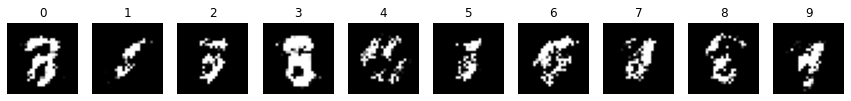

In [67]:
sample_imgs(generator, device)

Adjusting learning rate of group 0 to 1.0000e-01.
cuda
(10, 784) (10,)


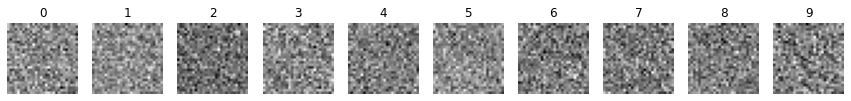

Original Real images


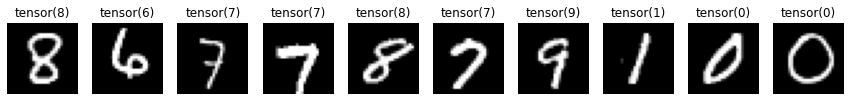

In [ ]:
class Maxout_layer(nn.Module):
    def __init__(self, input_dim=784, output_dim=240, pieces=5):
        super(Maxout_layer, self).__init__()
        self.fc_layers=[nn.Linear(in_features=input_dim,out_features=pieces)]*output_dim
    
    def forward(self,inp): # inp.shape=batch_size,784
        op=[fc_layer.to(inp.device)(inp) for fc_layer in self.fc_layers]
        op=torch.stack([torch.max(o,axis=1)[0] for o in op])
        op=op.permute(1,0)
        return op
        
# inp=torch.rand(2,3)
# m=Maxout_layer(3,4,5)
# op=m(inp)
# print(op.shape)

class Generator(nn.Module):
    def __init__(self, latent_dim=100, num_labels=10, output_dim=784):
        super(Generator, self).__init__()
        self.latent_dim=latent_dim
        self.num_labels=num_labels
        self.output_dim=output_dim
        
        self.embedding=torch.tensor(np.eye(self.num_labels)).float()
        
        self.dp1=nn.Dropout(0.5)
        self.fc1=nn.Linear(in_features=100,out_features=200)
        self.dp2=nn.Dropout(0.5)
        self.fc2=nn.Linear(in_features=10,out_features=1000)
        self.dp3=nn.Dropout(0.5)
        self.fc3=nn.Linear(in_features=1200,out_features=784)
                
    def forward(self,z,y): # z:batch_size,100; y:batch_size,
        z=self.dp1(z)
        op1=self.dp2(F.relu(self.fc1(z)))
        y_1hot=self.embedding.to(z.device)[y]
        op2=self.dp3(F.relu(self.fc2(y_1hot)))
        op=torch.cat((op1,op2),dim=-1) #batch_size,1200
        op=torch.sigmoid(self.fc3(op))  
        return op
# z=torch.rand(2,100)
# y=torch.randint(low=0,high=10,size=(2,))
# m=Generator(100,10,784)
# x=m(z,y)
# x.shape

class Discriminator(nn.Module):
    def __init__(self, input_dim=784, num_labels=10, output_dim=1):
        super(Discriminator, self).__init__()
        self.input_dim=input_dim
        self.num_labels=num_labels
        self.output_dim=output_dim
        
        self.embedding=torch.tensor(np.eye(self.num_labels)).float()
        
        self.dp0=nn.Dropout(0.5)
        self.max1=Maxout_layer(input_dim=input_dim, output_dim=240, pieces=5) #nn.Linear(input_dim, 240)#
        self.dp1=nn.Dropout(0.5)
        self.max2=Maxout_layer(input_dim=10, output_dim=50, pieces=5) #nn.Linear(10, 50)#
        self.dp2=nn.Dropout(0.5)
        self.max3=Maxout_layer(input_dim=290, output_dim=240, pieces=4) #nn.Linear(290, 240)#
        self.dp3=nn.Dropout(0.5)
        self.fc=nn.Linear(in_features=240, out_features=1)
    
    def forward(self,x,y): # x:batch_size,784; y:batch_size,
        x=self.dp0(x)
        op1=self.dp1(F.relu(self.max1(x)))
        y_1hot=self.embedding.to(y.device)[y]
        op2=self.dp2(F.relu(self.max2(y_1hot)))
        op=torch.cat((op1,op2),dim=-1)
        op=self.dp3(F.relu(self.max3(op)))
        op=torch.sigmoid(self.fc(op))
        return op

dataset=TensorDataset(data_X,data_Y)
data_loader=DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)

discriminator=Discriminator(input_dim=784, num_labels=10, output_dim=1)
generator=Generator(latent_dim=100, num_labels=10, output_dim=784)

loss_fn=nn.BCELoss() # or may use MSE
optim_disc=optim.SGD(discriminator.parameters(),lr=0.1,momentum=0.5)
scheduler_disc=optim.lr_scheduler.ExponentialLR(optim_disc, 1/1.00004, verbose=True)
optim_gen=optim.SGD(generator.parameters(),lr=0.1,momentum=0.5)
scheduler_gen=optim.lr_scheduler.ExponentialLR(optim_gen, 1/1.00004)

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

generator=generator.to(device)
discriminator=discriminator.to(device)
num_epochs=20
for ep in range(num_epochs):
    disc_loss,gen_loss=0,0
    if ep%5==0:
        sample_imgs(generator, device)

    for batch, (X,Y) in enumerate(data_loader):
        # if batch%100==0:
          # print(batch,end='\r')
          # display.clear_output(wait=True)
        if batch==0 and ep==0:
            print("Original Real images")
            plt.figure(figsize=(15.,30.))
            for ind in range(10):
                plt.subplot(1,10,ind+1)
                plt.title(Y[ind])
                plt.imshow(X[ind].reshape((28,28)),cmap='gray')
                plt.axis('off')
            plt.show()
        
        X,Y = X.to(device).float(), Y.to(device)

        z=torch.rand(X.shape[0],100).to(device)
        z_labels=torch.randint(low=0,high=10,size=(X.shape[0],)).to(device)

        # train the discriminator
        optim_disc.zero_grad()
        y_real=torch.ones(X.shape[0],1).to(device)
        y_pred_real=discriminator(X,Y.long())
        y_fake=torch.zeros(X.shape[0],1).to(device)
        # z=torch.rand(X.shape[0],100).to(device)
        # z_labels=torch.randint(low=0,high=10,size=(X.shape[0],)).to(device)
        X_fake=generator(z,z_labels)
        y_pred_fake=discriminator(X_fake,z_labels)
        loss1=loss_fn(y_pred_real,y_real)
        loss2=loss_fn(y_pred_fake,y_fake)
        loss=(loss1+loss2)/2
        disc_loss+=loss.item()
        loss.backward()
        optim_disc.step()
        

        # train the generator
        optim_gen.zero_grad()
        y_fool=torch.ones(X.shape[0],1).to(device)
        x_fake=generator(z,z_labels)
        y_pred=discriminator(x_fake,z_labels)
        loss=loss_fn(y_pred,y_fool)
        gen_loss+=loss.item()
        loss.backward()
        optim_gen.step()
        
    scheduler_disc.step()
    scheduler_gen.step()

    print("epoch:",ep,"discriminator loss:",disc_loss/batch,"generator loss:",gen_loss/batch)